# References
## Uchiyama et al. (2003a)
* Simulations were made with: 150 FF motoneurons, 75 FR motoneurons, 75 S motoneurons and 300 Renshaw cells.
* All motoneurons were stimulated for 3.5 s at the same rate by asynchronous descending command inputs and in successive trials. The mean rates of the descending command signals inputs were 10, 20, 30, ... , 400 pps.
* In order to obtain the mean firing rate of a single S-type MN, for example, the number of spikes discharged from 0.5 s to 3.5 s was divided by 3 s. The ensemble average of the rates of all S-type MNs (including the zero rates of nonactive MNs) was then calculated as the mean of the individual rates.

## Duchateau and Baudry (2014)
* Maximal discharge rate during slow isometric ramp contractions usually reaches values of 20–50 Hz whereas it can attain much higher values (>100 Hz), albeit briefly, during fast contractions (for reviews, see Enoka and Fuglevand, 2001; Duchateau and Enoka, 2011).

# Parameters adjusted
* None

# Considerations
* Simulations here were done with 600 Renshaw cells, as it has been done on previous notebooks.
* Results here are in variance with some of those presented in Uchiyama et al. (2003a):
    * Motoneuronal firing rate were higher and type FF motoneuron did start firing.
    * Renshaw cells firing rate were higher and started to show some saturation. The difference here is probably caused because FF type motoneurons did not fire.
*  Rate values herein simulated are not realistic, but are used to evaluate MNs behavior.

In [2]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
import glob

In [72]:
pps = range(0, 410, 10)
files=glob.glob("*.dat")
files.sort()
numberMN = 300
numberS = 75
numberFR = 75
numberFF = 150
numberRC = 600
tmin = 500
simDuration = 1000

<IPython.core.display.Javascript object>


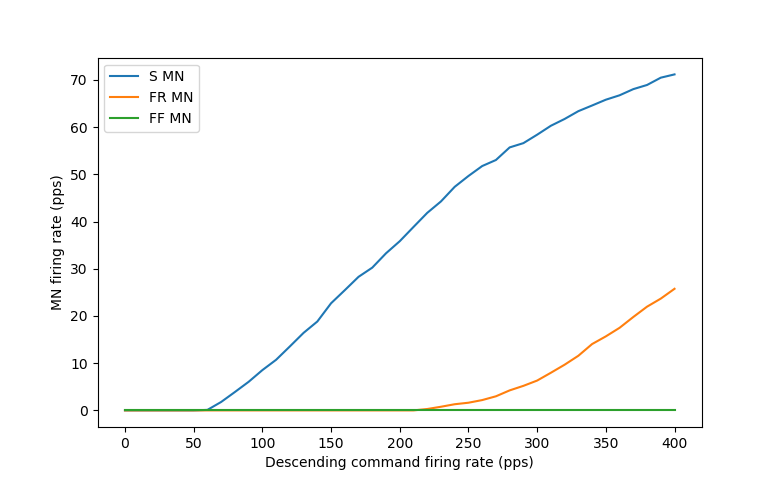

<IPython.core.display.Javascript object>


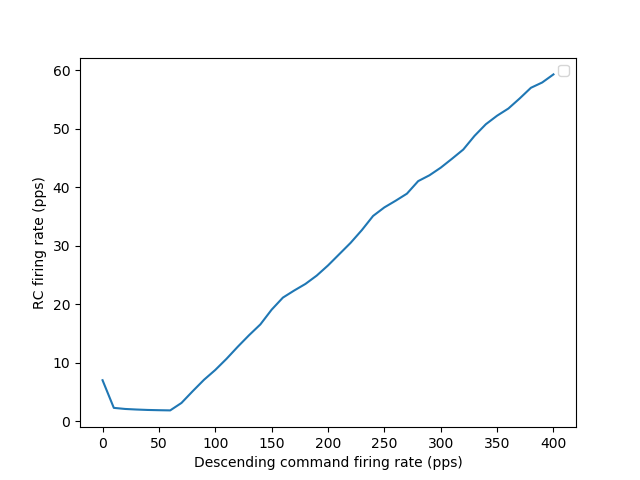

In [73]:
ratesOnTrial = []
for filename in files:
    MNSpikeInstant = []
    MNUnitNumber = []
    RCSpikeInstant = []
    RCUnitNumber = []
    section = 'MN'
    
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        if line[:2] == 'RC':
            section = 'RC'
            continue
        if section == 'MN':
            MNSpikeInstant.append(float(line.split()[0]))
            MNUnitNumber.append(int(float(line.split()[1])))
        elif section == 'RC':
            RCSpikeInstant.append(float(line.split()[0]))
            RCUnitNumber.append(int(float(line.split()[1])))
    f.close()
    
    firingRates = []
    for MNIndex in xrange(1, numberMN+1):
        MUactivity = [y for x, y in enumerate(MNSpikeInstant) if MNUnitNumber[x]==MNIndex]
        numberOfSpikes = len([x for x in MUactivity if x>tmin])
        firingRates.append(float(numberOfSpikes)*1e3/(simDuration-tmin)) # force division to floating point
    for RCIndex in xrange(1, numberRC+1):
        RCactivity = [y for x, y in enumerate(RCSpikeInstant) if RCUnitNumber[x]==RCIndex]
        numberOfSpikes = len([x for x in RCactivity if x>tmin])
        firingRates.append(float(numberOfSpikes)*1e3/(simDuration-tmin)) # force division to floating point

    # For avarage of the population
    firingRatesByPopulation = []
    firingRatesByPopulation.append(sum(firingRates[:numberS])/numberS)
    firingRatesByPopulation.append(sum(firingRates[numberS:numberS+numberFR])/numberFR)
    firingRatesByPopulation.append(sum(firingRates[numberS+numberFR:numberS+numberFR+numberFF])/numberFF)
    firingRatesByPopulation.append(sum(firingRates[numberS+numberFR+numberFF:])/numberRC)
    
    ratesOnTrial.append(firingRatesByPopulation)
    
S = [item[0] for item in ratesOnTrial]
FR = [item[1] for item in ratesOnTrial]
FF = [item[2] for item in ratesOnTrial]
RC = [item[3] for item in ratesOnTrial]

plt.figure()
plt.plot(pps, S, '-', label = "S MN")
plt.plot(pps, FR, '-', label = "FR MN")
plt.plot(pps, FF, '-', label = "FF MN")
plt.legend()
plt.xlabel('Descending command firing rate (pps)')
plt.ylabel('MN firing rate (pps)')
plt.show()

plt.figure()
plt.plot(pps, RC, '-')
plt.legend()
plt.xlabel('Descending command firing rate (pps)')
plt.ylabel('RC firing rate (pps)')
plt.show()